# TZ Gaming: Optimal Targeting of Mobile Ads

In [1]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import seaborn as sns

# increase plot resolution
mpl.rcParams["figure.dpi"] = 200

In [2]:
# check that you have version 0.9.13 of the pyrsm package
# install in a terminal using: pip install --user "pyrsm>=0.9.13"
print(rsm.__version__)

0.9.13


In [3]:
# loading data tz_gaming.parquet

tz_gaming = pd.read_parquet('data/tz_gaming.parquet')


> Note: Review the data description carefully and watch the "Video: TZ gaming preview (12 min)" linked on Canvas

> Note: Full question details are contained in the tz-gaming-msba.pdf file


## Part I: Logistic regression (10 points)

a. Estimate a logistic regression model with the following variables `time_fct app mobile_os impua clua ctrua` as the explanatory variables (features) and `click` as the response variable (target)

> Note: Use only the rows that are labeled `train` in the `training` variable



In [4]:
# a. Estimate a logistic regression model
# Filter the data to include only training rows
training_data = tz_gaming[tz_gaming['training'] == 'train']

In [5]:
# Define the logistic regression model
lr = rsm.model.logistic(
    data={"tz_gaming": training_data},
    rvar="click",
    evar=["time_fct", "app", "mobile_os", "impua", "clua", "ctrua"]
)

b. Summarize and interpret the logistic regression results. Which of these explanatory variables are statistically significant? Which variables seem to be most "important"? Make sure your model evaluation includes (1) an interpretation of the Permutation importance and Prediction plots for the explanatory variables `mobile_os`, `impua`, `clua`, and `ctrua` and (2) an evaluation of the model as a whole using Pseudo R-squared and the Chi-square test (5 points).

In [6]:
# discuss and add code to calculate additional statistics as needed

# b. Model summary and interpretation
# Summarize the model and interpret results
lr.summary(main = False, fit = True)


Pseudo R-squared (McFadden): 0.109
Pseudo R-squared (McFadden adjusted): 0.092
Area under the RO Curve (AUC): 0.792
Log-likelihood: -3946.072, AIC: 8046.145, BIC: 8768.389
Chi-squared: 968.279, df(76), p.value < 0.001 
Nr obs: 87,535


In [7]:
lr.summary()

Logistic regression (GLM)
Data                 : tz_gaming
Response variable    : click
Level                : None
Explanatory variables: time_fct, app, mobile_os, impua, clua, ctrua
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

                     OR      OR%  coefficient   std.error  z.value p.value     
Intercept         0.029   -97.1%        -3.53       0.197  -17.936  < .001  ***
time_fct[2]       0.622   -37.8%        -0.47       0.321   -1.478   0.139     
time_fct[3]       0.718   -28.2%        -0.33       0.454   -0.730   0.466     
time_fct[4]       0.000  -100.0%       -23.54   42007.161   -0.001     1.0     
time_fct[5]       0.000  -100.0%       -23.72   55229.970   -0.000     1.0     
time_fct[6]       0.349   -65.1%        -1.05       1.021   -1.030   0.303     
time_fct[7]       1.221    22.1%         0.20       0.426    0.468    0.64     
time_fct[8]       1.104    10.4%         0.10       0.296    0.335   0.737     
time_fc

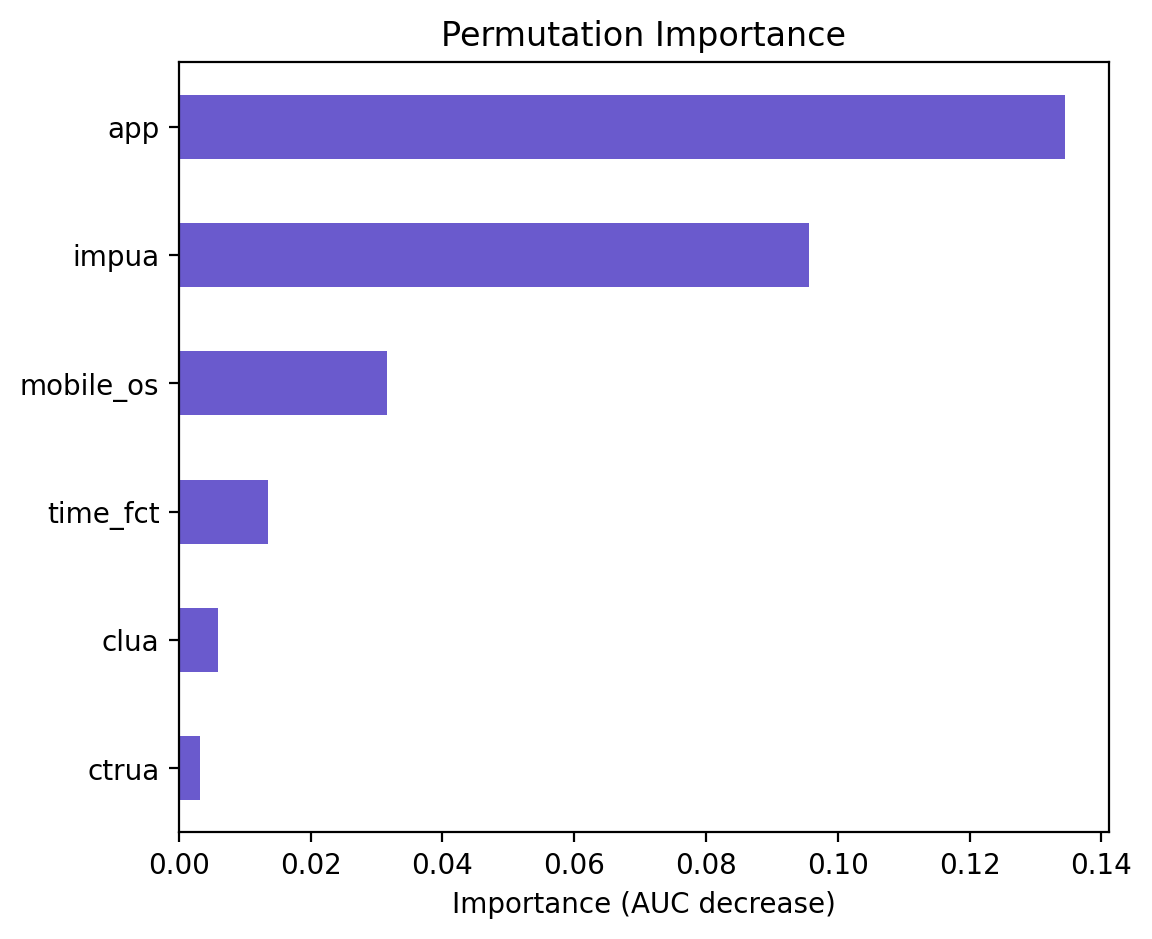

In [8]:
lr.plot("vimp")

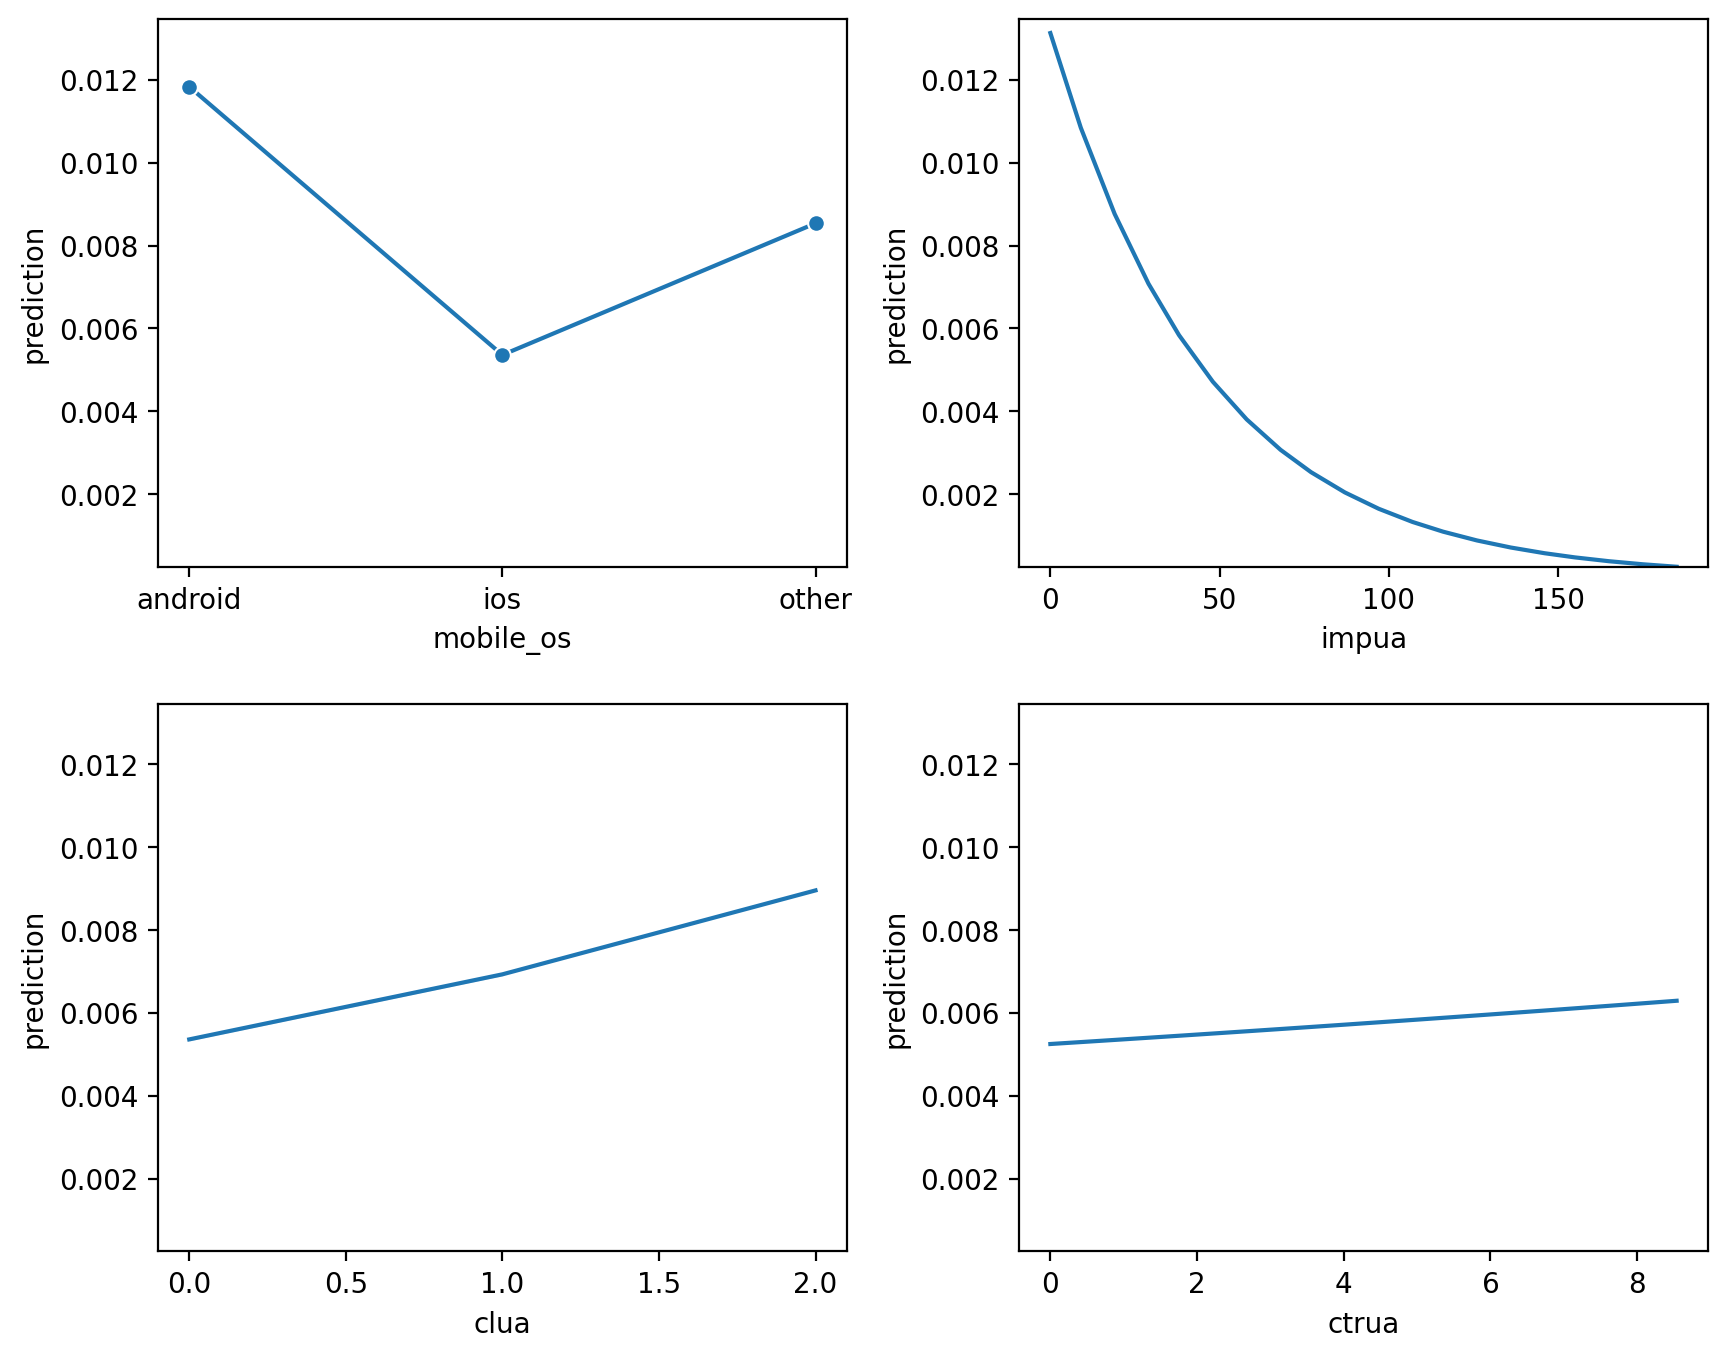

In [9]:
lr.plot("pred", incl=["mobile_os", "impua", "clua", "ctrua"])





The logistic regression results display a mix of statistically significant and non-significant predictors of clicks. The significant variables are indicated by p-values less than 0.05, marked with asterisks, and include features like app, certain levels of time_fct, mobile_os, impua, clua, and ctrua.

The McFadden Pseudo R-squared values suggest a modest explanatory power of the model, with the model explaining approximately 10.9% of the variability in the response variable, which is click-through.

The AUC value of 0.792 is quite good, indicating that the model has a high ability to distinguish between the positive class (clicks) and the negative class (no clicks).

The Chi-squared test result is significant, suggesting the model predictors, as a whole, are meaningful. However, the large number of observations (87,535) could be inflating the Chi-squared value.

Permutation importance shows app as highly predictive, suggesting changes in the application used can significantly affect click-through probability. The prediction plots reveal the expected probabilities of click-through for different levels of mobile_os, impua, clua, and ctrua, with mobile_os[ios] showing a notably lower probability compared to other OS categories.





c. Predict the probability of a click (2 point)

The estimated logistic regression model can predict the probability of a click. Create a new variable `pred_logit` with the predicted click-through probabilities linked to each impression. Make sure to generate predictions for all rows in the training and test data.


In [10]:
# c. Predict the probability of a click
# Generate predictions for all rows
tz_gaming["pred_logit"] = lr.predict(data=tz_gaming)["prediction"]


d. Estimate a logistic regression with `click` as the response variable and `rnd` as the **only** explanatory variable. As before, the model should be estimated on the training sample (i.e., "training == 'train'"). Create a new variable `pred_rnd` with the predicted click-through probabilities (1 point).

In [11]:
# d. Estimate a logistic regression with 'click' as the response variable and 'rnd' as the only explanatory variable
lr_rnd = rsm.model.logistic(
    data={"tz_gaming": training_data},
    rvar="click",
    evar=["rnd"]
)

# Create a new variable with the predicted click-through probabilities
tz_gaming["pred_rnd"] = lr_rnd.predict(data=tz_gaming)["prediction"]


## Part II: Understanding Multicollinearity (10 points)

a. Estimate a logistic regression model with `click` as the response variable and `imppat`, `clpat`, and `ctrpat` as the only explanatory variables. What is the interpretation of the Prediction plots for the explanatory variables? (2 points)

> Note: Make sure to watch the "Video: TZ gaming preview (12 min)" on Canvas before answering this questions so you fully understand what the variables represent

In [12]:
# a. Estimate a logistic regression model
lr_mc1 = rsm.model.logistic(
    data={"tz_gaming": training_data},
    rvar="click",
    evar=["imppat", "clpat", "ctrpat"]
)

In [13]:
lr_mc1.summary()

Logistic regression (GLM)
Data                 : tz_gaming
Response variable    : click
Level                : None
Explanatory variables: imppat, clpat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.004  -99.6%        -5.42      0.073  -74.156  < .001  ***
imppat     1.000   -0.0%        -0.00      0.000   -4.802  < .001  ***
clpat      1.002    0.2%         0.00      0.000    5.713  < .001  ***
ctrpat     1.615   61.5%         0.48      0.034   13.933  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.035
Pseudo R-squared (McFadden adjusted): 0.035
Area under the RO Curve (AUC): 0.676
Log-likelihood: -4273.088, AIC: 8554.176, BIC: 8591.695
Chi-squared: 314.248, df(3), p.value < 0.001 
Nr obs: 87,535


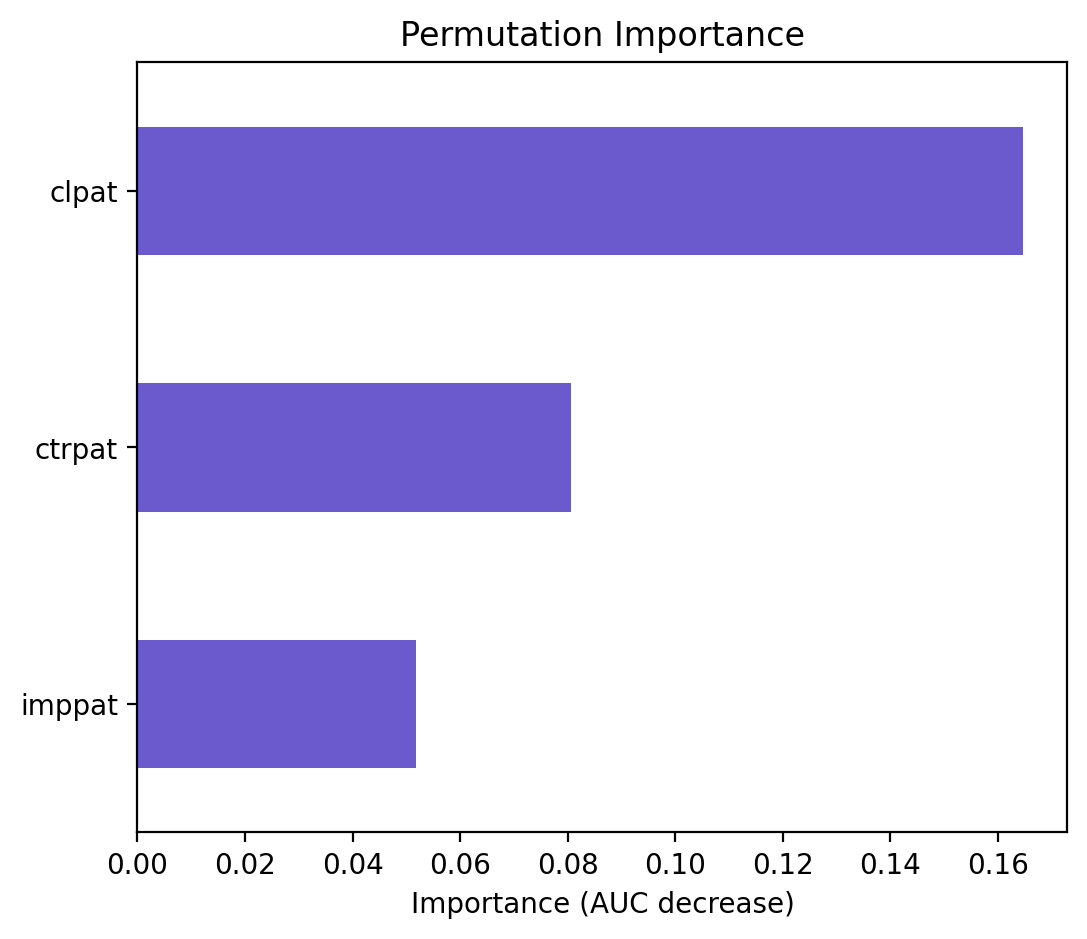

In [14]:
lr_mc1.plot("vimp")

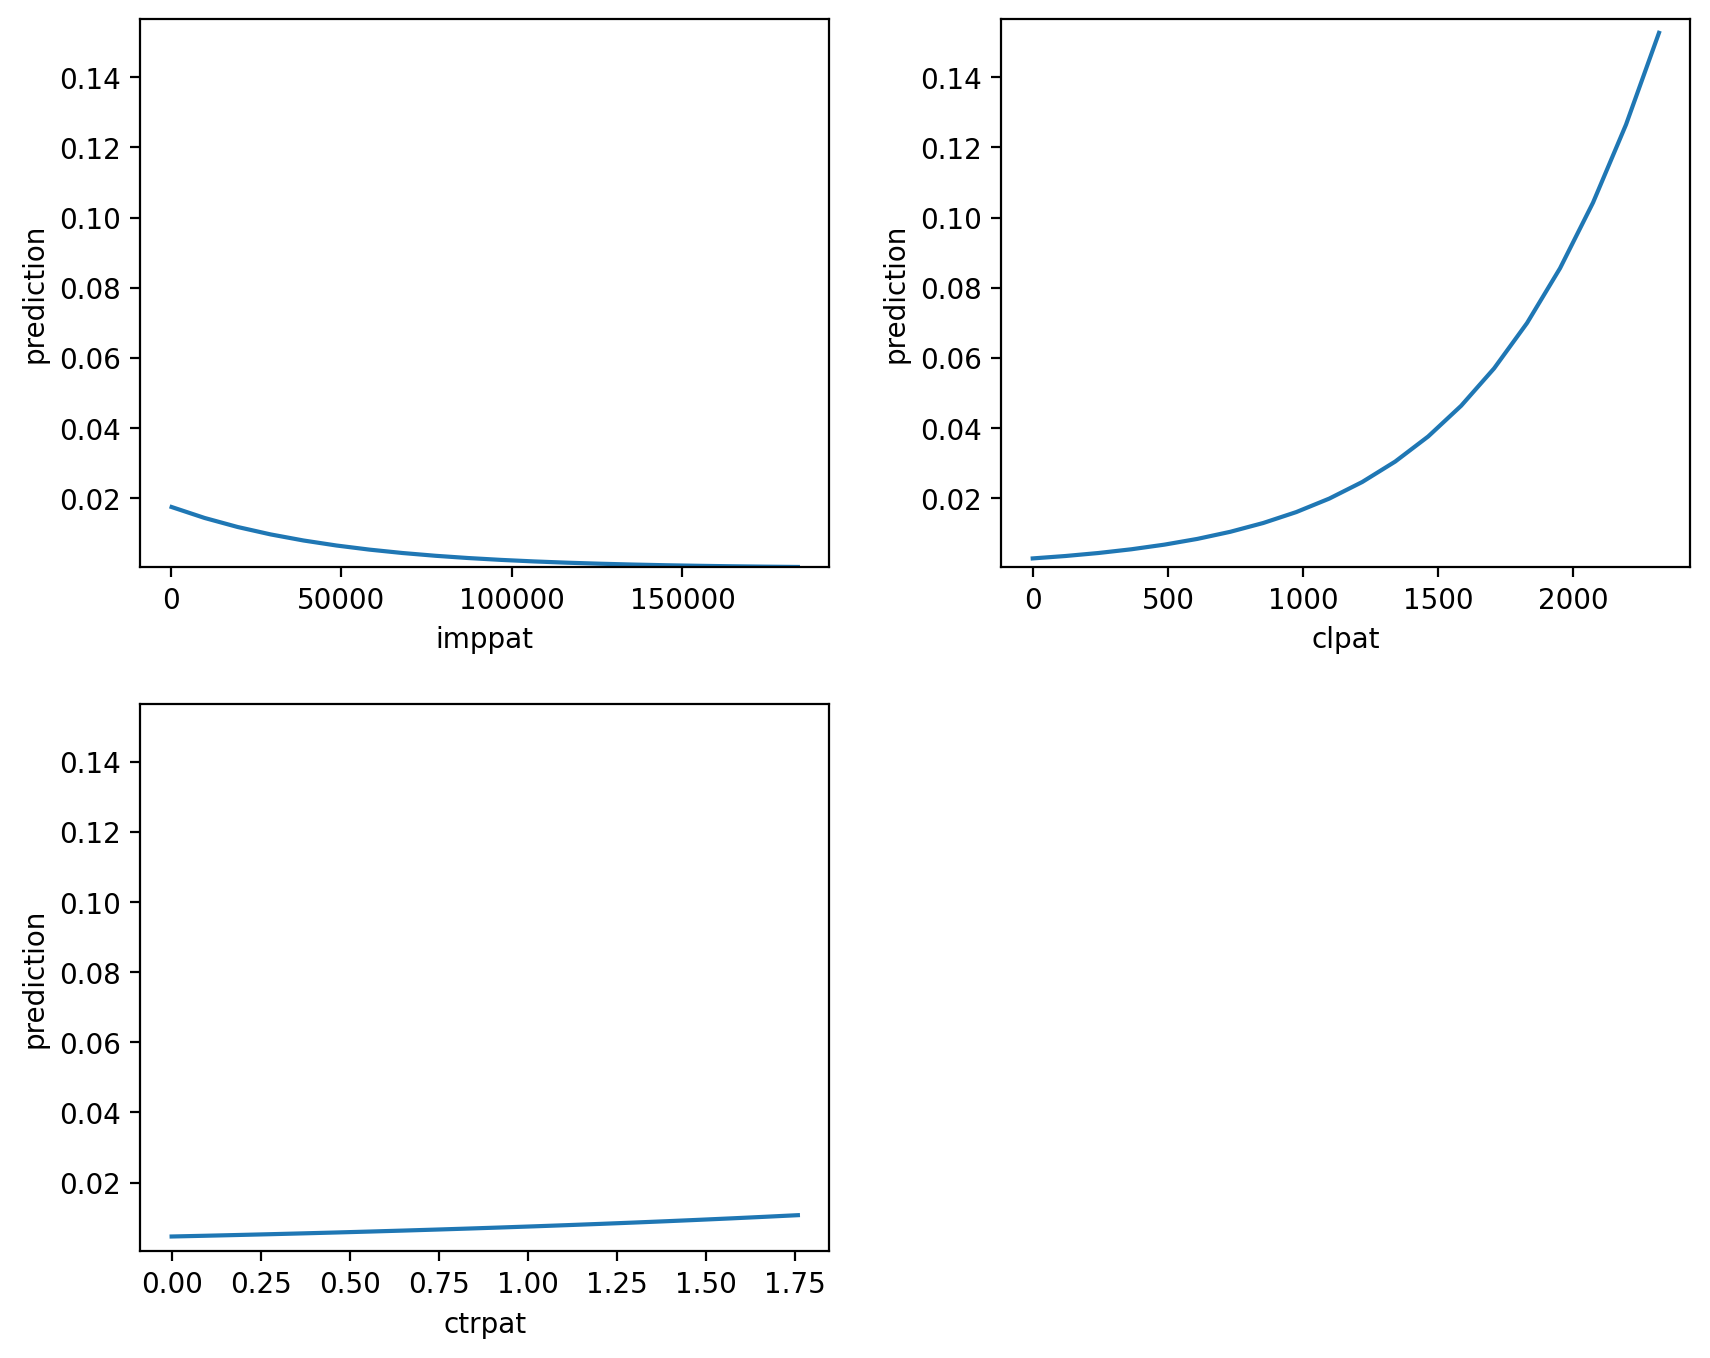

In [15]:
lr_mc1.plot("pred", incl=["imppat", "clpat", "ctrpat"])


Logistic Regression Results: The model includes imppat (impression pattern), clpat (click pattern), and ctrpat (click-through rate pattern) as explanatory variables. The results indicate significant coefficients for clpat and ctrpat, which means that increases in these variables are associated with a higher probability of a click. imppat has a significant but very small negative coefficient.

Pseudo R-squared: The McFadden Pseudo R-squared value is 0.035, suggesting the model explains a modest portion of the variability in clicks.

AUC Value: The AUC of 0.676 indicates the model has moderate discriminative ability.

Prediction Plot Interpretations:

The prediction plot for imppat suggests a slight decrease in the probability of a click as the impression pattern increases.
For clpat, the prediction plot shows a significant increase in the probability of a click as the click pattern increases.
Similarly, the prediction plot for ctrpat indicates a positive correlation between the click-through rate pattern and the probability of a click; the probability of a click increases with higher ctrpat values.
These metrics imply that clpat and ctrpat may be more important for predicting user click behavior, whereas imppat, while statistically significant, may have a minimal practical impact.









b. Some of the variables in the dataset are highly correlated with each other. In particular, `imppat` and `clpat` have a strong positive correlation of 0.97. Discuss the implications of this (very) high level of collinearity and also different approaches to deal with it. What are the implications for the model and the interpretation of the Prediction plots? As part of your answer, discuss the change in the Prediction plot for `imppat` when you remove `clpat` from the model you estimated for II.a (4 points).

> Note: Assign your new model without `clpat` to a new object `lr_mc2`. Calculate VIF statistics for each explanatory variable in the model


In [16]:
# Define the logistic regression model without clpat
lr_mc2 = rsm.model.logistic(
    data={"tz_gaming": training_data},
    rvar="click",
    evar=["imppat", "ctrpat"],
)

In [17]:
lr_mc2.summary()

Logistic regression (GLM)
Data                 : tz_gaming
Response variable    : click
Level                : None
Explanatory variables: imppat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

              OR     OR%  coefficient  std.error  z.value p.value     
Intercept  0.004  -99.6%        -5.53      0.068  -80.814  < .001  ***
imppat     1.000    0.0%         0.00      0.000    5.460  < .001  ***
ctrpat     1.733   73.3%         0.55      0.030   18.422  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.031
Pseudo R-squared (McFadden adjusted): 0.031
Area under the RO Curve (AUC): 0.674
Log-likelihood: -4290.903, AIC: 8587.805, BIC: 8615.945
Chi-squared: 278.619, df(2), p.value < 0.001 
Nr obs: 87,535


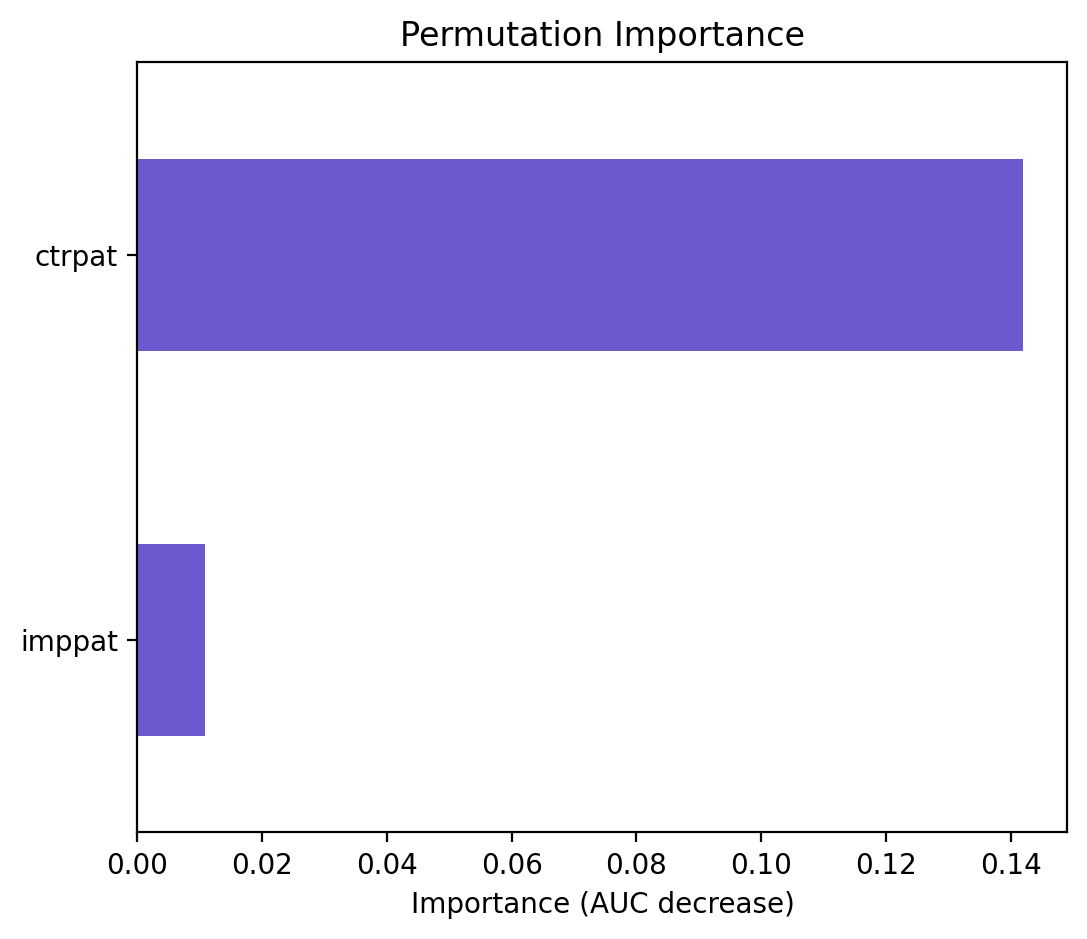

In [18]:
lr_mc2.plot("vimp")

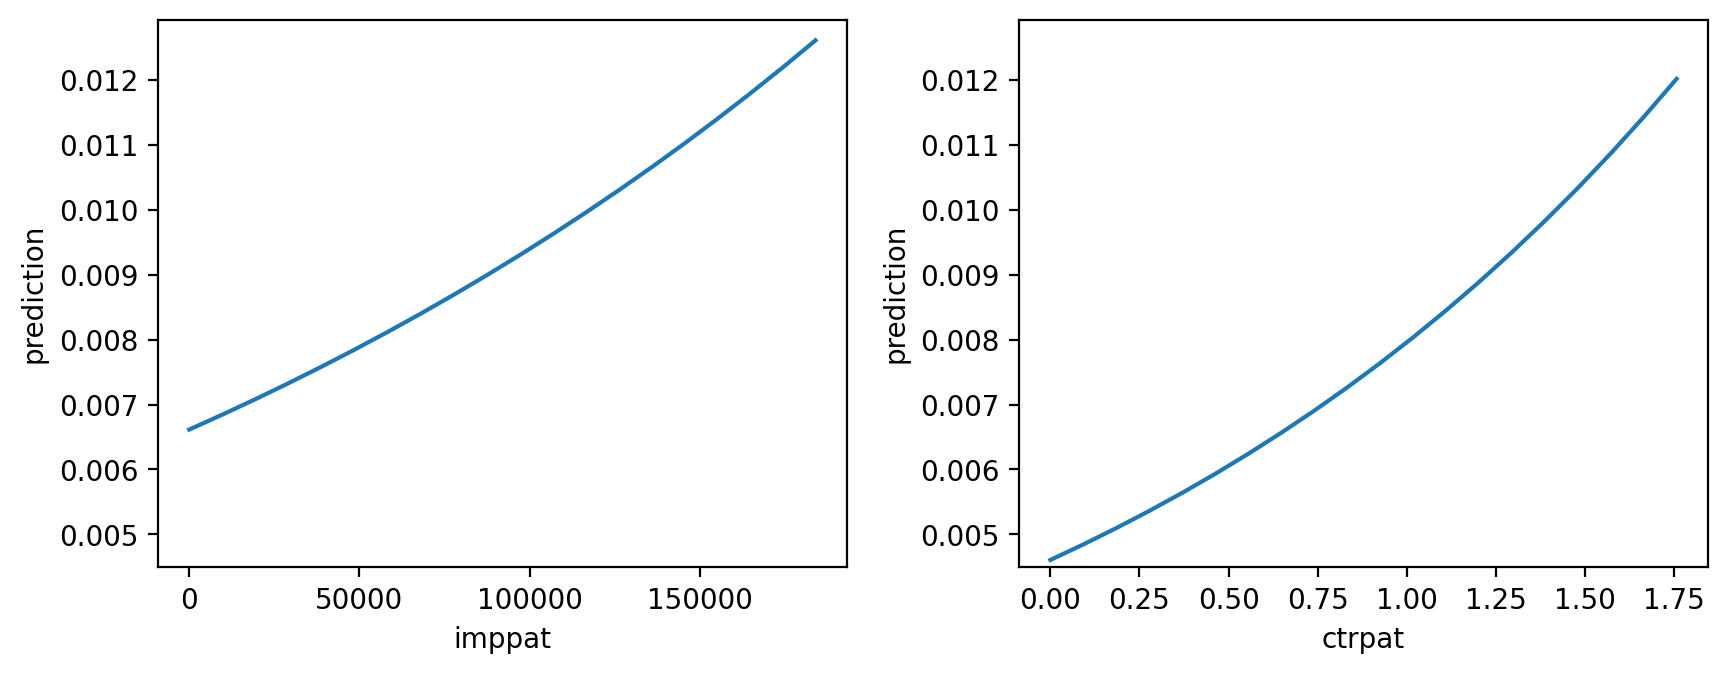

In [19]:
lr_mc2.plot("pred", incl=["imppat", "ctrpat"])

In the logistic regression model for TZ Gaming's mobile ad data, imppat (impressions pattern) and clpat (clicks pattern) were initially included as predictors for ad clicks. However, these two variables exhibited a very high correlation (0.97), indicating multicollinearity. This level of correlation can lead to unstable estimates of coefficients and inflated standard errors, complicating the interpretation of each variable's effect.

To address multicollinearity, several strategies were discussed:

Removing one of the correlated variables from the model.
Combining the variables into a single variable.
Using Principal Component Analysis (PCA) to create new uncorrelated variables.
Applying ridge regression or LASSO to penalize the regression model.
When clpat was removed from the model, the pseudo R-squared decreased slightly, indicating that clpat carried some predictive power. The variance inflation factor (VIF) for imppat dropped significantly, suggesting an alleviation of multicollinearity. Additionally, the coefficient for imppat changed from negative to positive, and the prediction plot's slope for imppat turned upwards, suggesting that an increase in past impressions now increases the likelihood of a click, a more intuitive result compared to the previous model where clpat was included.

The updated model with just imppat and ctrpat (click-through rate pattern) still remains significant, as indicated by the low p-values, and the model's AUC indicates moderate discriminative ability. This approach simplifies the model and potentially enhances the interpretation of the prediction plots, as now each predictor's impact on click probability can be more clearly discerned.







c. Estimate another logistic regression model with `click` as the response variable and `time_fct`, `app`, `imppat`, `clpat`, and `ctrpat` as the explanatory variable. Why are the Prediction plots for `imppat`, `clpat`, and `ctrpat` different compared to the plots from the model you estimated in II.a? Please be specific and investigate beyond simply stating the statistical problem (4 points).


In [20]:
lr_mc3 = rsm.model.logistic(
    data={"tz_gaming": training_data},
    rvar="click",
    evar=["time_fct", "app", "imppat", "clpat", "ctrpat"],
)

In [21]:
lr_mc3.summary()

Logistic regression (GLM)
Data                 : tz_gaming
Response variable    : click
Level                : None
Explanatory variables: time_fct, app, imppat, clpat, ctrpat
Null hyp.: There is no effect of x on click
Alt. hyp.: There is an effect of x on click

                 OR      OR%  coefficient   std.error  z.value p.value     
Intercept     0.012   -98.8%        -4.42       0.284  -15.575  < .001  ***
time_fct[2]   0.588   -41.2%        -0.53       0.323   -1.644     0.1     
time_fct[3]   0.693   -30.7%        -0.37       0.461   -0.795   0.426     
time_fct[4]   0.000  -100.0%       -23.83   43904.903   -0.001     1.0     
time_fct[5]   0.000  -100.0%       -23.86   57249.164   -0.000     1.0     
time_fct[6]   0.359   -64.1%        -1.03       1.027   -0.999   0.318     
time_fct[7]   1.220    22.0%         0.20       0.438    0.453    0.65     
time_fct[8]   1.135    13.5%         0.13       0.309    0.411   0.681     
time_fct[9]   1.063     6.3%         0.06       0.2

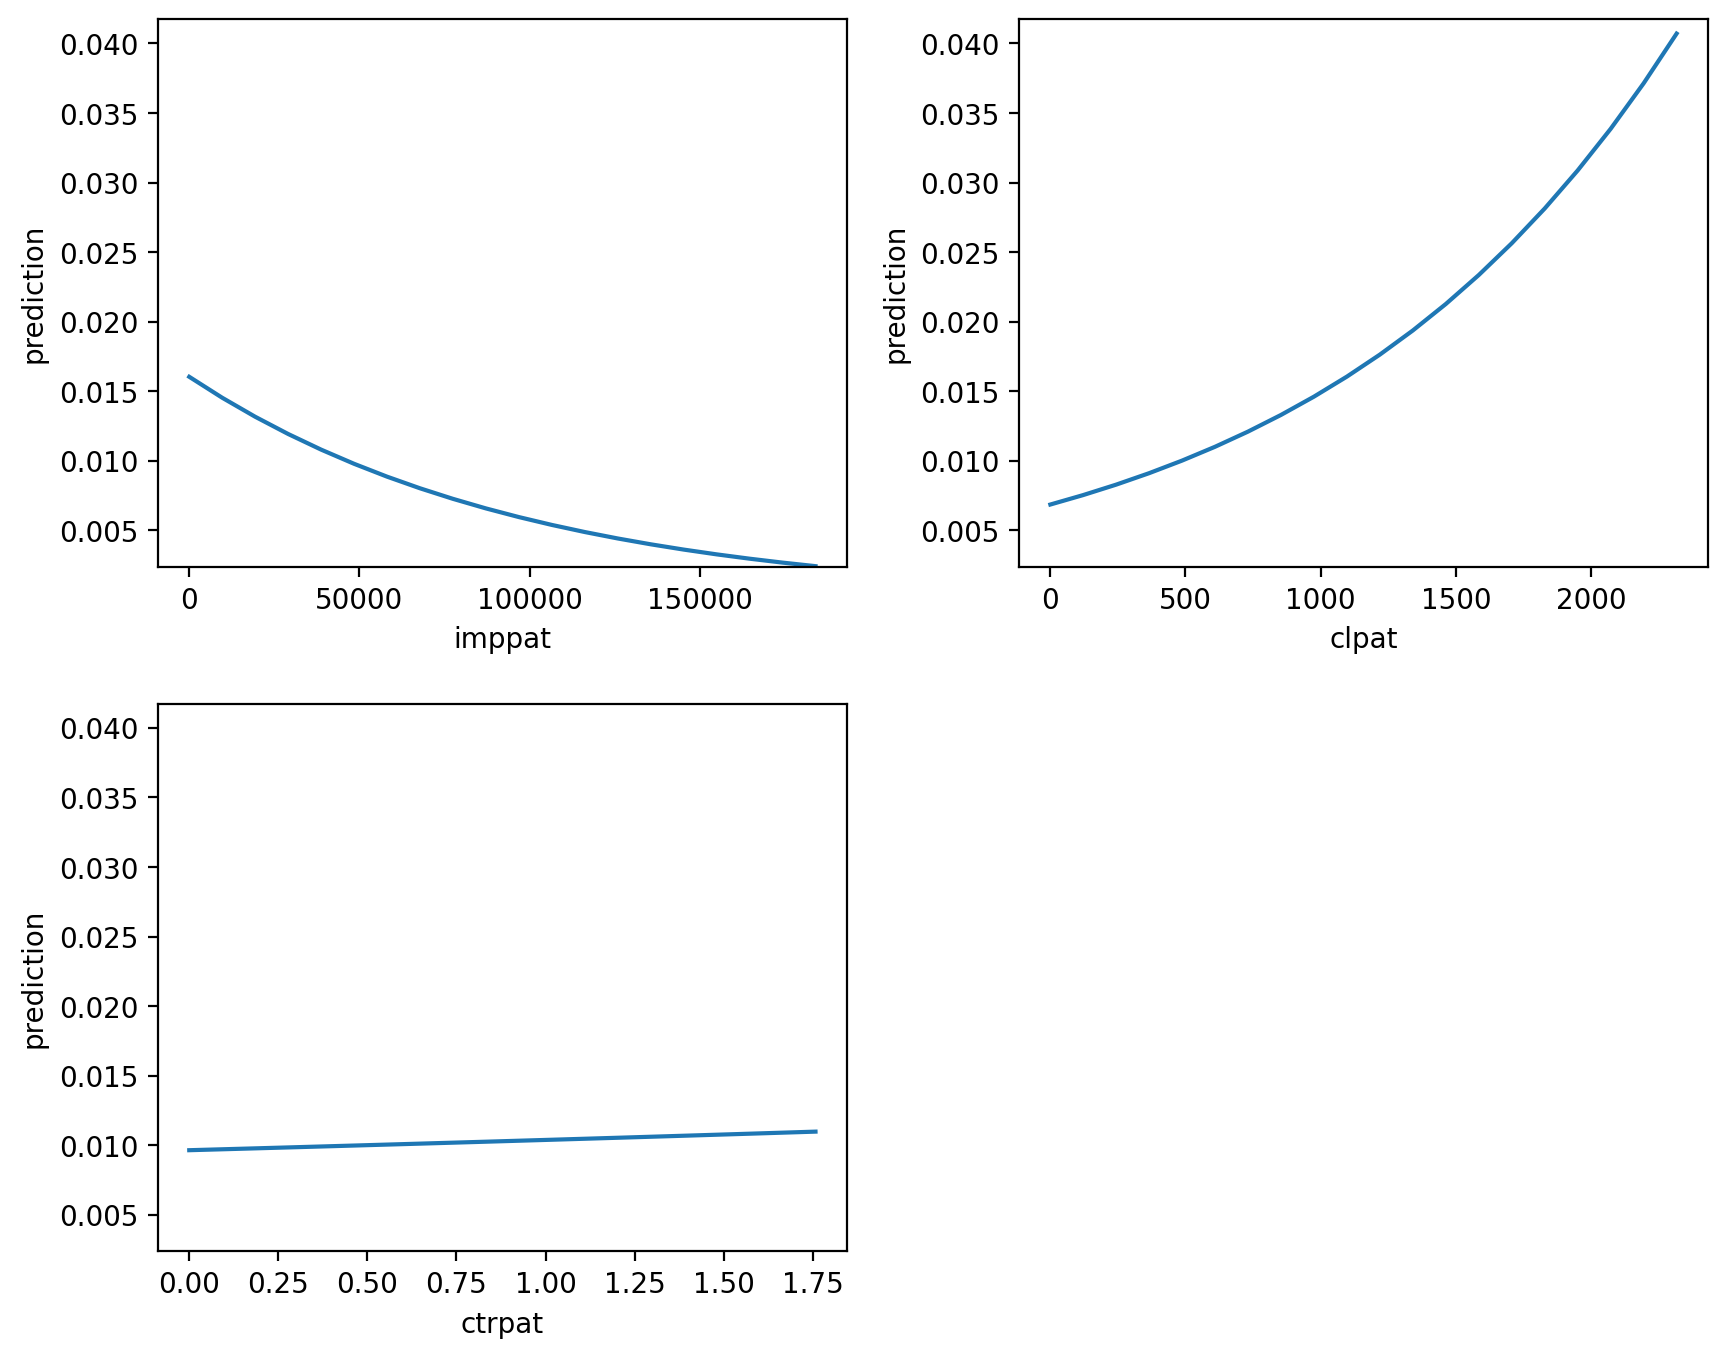

In [22]:
lr_mc3.plot("pred", incl=["imppat", "clpat", "ctrpat"])

The correlation between imppat (past impressions of ads in the hour) and clpat (past clicks of ads in the hour) is very high, indicating a multicollinearity issue in the logistic regression model. Multicollinearity can inflate the standard errors of coefficients, making it difficult to discern the individual effect of each variable. One way to address this is to remove one of the correlated variables or to apply techniques like Principal Component Analysis (PCA) or regularization methods (e.g., LASSO or Ridge regression) that can help reduce the impact of multicollinearity.

When the variable clpat is removed from the model, the coefficient for imppat changes, suggesting its predictive power has shifted. This change is reflected in the prediction plots, where the slope for imppat turns positive, indicating an increase in past impressions may now be associated with a higher likelihood of a click. This could make the interpretation of the model more intuitive as it aligns with the expectation that more impressions could lead to more clicks, assuming all other factors remain constant.

Including additional variables like time_fct and app can redistribute explanatory power and potentially control confounding effects. This might alter the dynamics between variables, leading to changes in the prediction plots for imppat, clpat, and ctrpat. These changes underscore the importance of considering the broader context and the interaction between variables when modeling and interpreting regression results.

## Part III: Decile Analysis of Logistic Regression Results (5 points)

> Note: For the following questions, use only the "test" sample of impressions (i.e., 27,953 rows
where "training == 'test'")

In [23]:
tz_test = tz_gaming[tz_gaming['training'] == 'test']
tz_test

,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,clut,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd
87535,test,I300002,no,21,21,app1,android,1458,3,0.205761,...,0,0.000000,68113,957,1.405018,0.147891,0.003961,id466983,1.020981e-02,0.008791
87536,test,I300006,no,3,3,app40,ios,3,0,0.000000,...,0,0.000000,50,0,0.000000,0.383246,0.018965,id946375,8.665095e-03,0.008718
87537,test,I300012,no,5,5,app12,android,5057,6,0.118647,...,0,0.000000,754,8,1.061008,1.274485,0.003961,id479295,1.910723e-14,0.008448
87538,test,I300015,no,10,10,app1,android,1993,10,0.501756,...,0,0.000000,26537,276,1.040057,0.673022,0.003961,id83284,6.240407e-03,0.008630
87539,test,I300016,no,14,14,app1,ios,212,7,3.301887,...,1,5.263158,57348,874,1.524029,-0.785851,0.050679,id359434,1.233449e-02,0.009086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,test,I399982,no,21,21,app2,ios,2110,0,0.000000,...,0,0.000000,23216,19,0.081840,-1.852059,0.003961,id847352,1.093091e-03,0.009435
115484,test,I399986,no,17,17,app14,android,291,1,0.343643,...,1,1.351351,3665,14,0.381992,-0.296415,0.003961,id457437,3.609483e-03,0.008930
115485,test,I399991,no,23,23,app1,android,364,3,0.824176,...,0,0.000000,173353,2292,1.322158,0.099201,0.003961,id792352,2.052670e-02,0.008806
115486,test,I399992,no,20,20,app6,android,59,2,3.389831,...,1,2.702703,3474,53,1.525619,-0.186421,0.050679,id115678,2.192207e-02,0.008896


a. Assign each impression to a decile based on the predicted probability of click through (`pred_logit`) based on the model estimated in I.a. Create a new variable `pred_logit_dec` that captures this information. Note: The first decile should have the highest average click-through rate. If not, make sure to "reverse" the decile numbers (i.e., 10 becomes 1, 9 becomes 2, etc.). Use the `xtile` function from the `pyrsm` package to create the deciles (2 points)

In [24]:
# Assign each impression to a decile based on predicted probability of click through
tz_gaming["pred_logit_dec"] = (
    tz_gaming
    .groupby("training")
    .pred_logit
    .transform(rsm.xtile, 10, rev=True))

tz_gaming


,training,inum,click,time,time_fct,app,mobile_os,impup,clup,ctrup,...,ctrut,imppat,clpat,ctrpat,rnd,pred_vneta,id,pred_logit,pred_rnd,pred_logit_dec
0,train,I7,no,9,9,app8,ios,439,2,0.455581,...,0.000000,71,1,1.408451,-1.207066,0.003961,id247135,3.382977e-13,0.009222,10
1,train,I23,no,15,15,app1,ios,64,0,0.000000,...,0.000000,67312,1069,1.588127,0.277429,0.003961,id245079,1.156355e-02,0.008751,3
2,train,I28,no,12,12,app5,ios,80,0,0.000000,...,0.000000,331,1,0.302115,1.084441,0.003961,id927245,2.655311e-03,0.008505,7
3,train,I30,no,19,19,app1,ios,25,0,0.000000,...,0.000000,71114,1001,1.407599,-2.345698,0.018965,id922188,1.349420e-02,0.009600,3
4,train,I35,no,24,24,app1,android,3834,29,0.756390,...,1.215805,183852,2317,1.260253,0.429125,0.003961,id355833,1.868222e-03,0.008704,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,test,I399982,no,21,21,app2,ios,2110,0,0.000000,...,0.000000,23216,19,0.081840,-1.852059,0.003961,id847352,1.093091e-03,0.009435,8
115484,test,I399986,no,17,17,app14,android,291,1,0.343643,...,1.351351,3665,14,0.381992,-0.296415,0.003961,id457437,3.609483e-03,0.008930,6
115485,test,I399991,no,23,23,app1,android,364,3,0.824176,...,0.000000,173353,2292,1.322158,0.099201,0.003961,id792352,2.052670e-02,0.008806,2
115486,test,I399992,no,20,20,app6,android,59,2,3.389831,...,2.702703,3474,53,1.525619,-0.186421,0.050679,id115678,2.192207e-02,0.008896,1


b. Report the number of impressions, the number of clicks, and the click-through rate for the TZ ad per decile and save this information to a DataFrame. Use the name `dec_tab` for the new data frame (2 points)

In [25]:
# your data frame should have columns called 'nr_impressions', 'nr_clicks', and 'ctr'
# to calculate these values you need deciles, the number of rows (impressions)
# in each decile, the number of clicks in each decile using the `click` variable,
# and the ratio of clicks to impressions (ctr)

tz_gaming['click_yes'] = rsm.ifelse(
    tz_gaming['click'] == 'yes', 1, rsm.ifelse(tz_gaming['click'] == 'no', 0, np.nan)
)
# Initialize an empty list to store the decile information
dec_tab = (
    tz_gaming[tz_gaming.training == 'test'].groupby('pred_logit_dec')
    .agg(
        nr_impressions = ('pred_logit', 'count'),
        nr_clicks = ('click_yes', 'sum'),
        ctr = ('click_yes', 'mean')
    )
    .reset_index()
)

dec_tab



,pred_logit_dec,nr_impressions,nr_clicks,ctr
0,1,2796,103.0,0.036838
1,2,2793,48.0,0.017186
2,3,2788,42.0,0.015065
3,4,2796,30.0,0.010730
4,5,2802,15.0,0.005353
5,6,2796,7.0,0.002504
6,7,2794,7.0,0.002505
7,8,2796,3.0,0.001073
8,9,2796,4.0,0.001431
9,10,2796,12.0,0.004292


c. Create a bar chart of click-through rates per decile (i.e., use `pred_logit_dec` as the x-variable and `ctr` as the y-variable). Note that the "click through rate" is not the same as the "predicted probability of click." The click-through rate captures the proportion of impressions in a given group (e.g., in a decile) that actually resulted in a click (1 point)


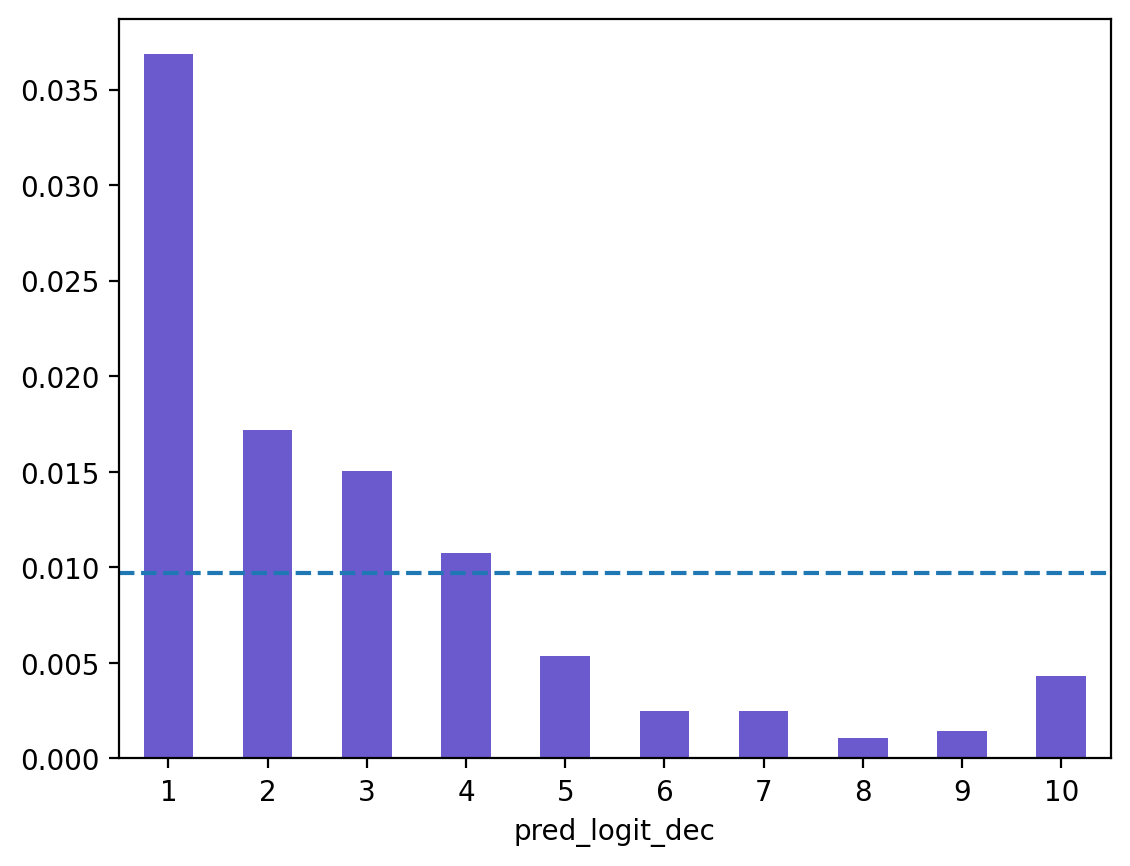

In [26]:
# Create a bar chart of click-through rates per decile
fig = dec_tab.plot.bar(x='pred_logit_dec', y='ctr', rot=0, color='slateblue', legend=None)

# Add a horizontal dashed line representing the average click-through rate
fig = fig.axhline(y=dec_tab['ctr'].mean(), linestyle='--')



## Part IV: Lift, Gains, and Profit (15 points)

Use the `dec_tab` DataFrame you created in Part III for the following calculations.

a. Write python code to generate a table with the cumulative proportion of impressions and the cumulative gains for each decile (8 points)

> Note: Do NOT use any specialized python packages to construct the gains table. Write the python code from scratch. Feel free use ChatGPT or CoPilot, but make sure that it does not use any specialized packages to construct the gains table. Be prepared to discuss the code you submit for this question in class if called upon

In [27]:
# Sort the dec_tab DataFrame by 'dec_logit' in ascending order
dec_tab_sorted = dec_tab.sort_values(by='pred_logit_dec')

# Calculate the cumulative sum of 'nofimpressions' and 'nr_clicks' columns
dec_tab_sorted['cumulative_impressions'] = dec_tab_sorted['nr_impressions'].cumsum()
dec_tab_sorted['cumulative_clicks'] = dec_tab_sorted['nr_clicks'].cumsum()

# Calculate the cumulative proportion of impressions and cumulative gains
dec_tab_sorted['cumulative_proportion'] = dec_tab_sorted['cumulative_impressions'] / dec_tab_sorted['cumulative_impressions'].max()
dec_tab_sorted['cumulative_gains'] = dec_tab_sorted['cumulative_clicks'] / dec_tab_sorted['cumulative_clicks'].max()

# Select the relevant columns for the gains table
gains_table = dec_tab_sorted[['pred_logit_dec', 'cumulative_proportion', 'cumulative_gains']]

# Display the gains table
print(gains_table)


   pred_logit_dec  cumulative_proportion  cumulative_gains
0               1               0.100025          0.380074
1               2               0.199943          0.557196
2               3               0.299682          0.712177
3               4               0.399707          0.822878
4               5               0.499946          0.878229
5               6               0.599971          0.904059
6               7               0.699925          0.929889
7               8               0.799950          0.940959
8               9               0.899975          0.955720
9              10               1.000000          1.000000


b. Use `seaborn`, `matplotlib`, or `pandas` to create a chart showing the cumulative gains per decile along with a (diagonal) reference line to represent the "no model" scenario. Put cumulative gains on the Y-axis and cumulative proportion of impressions on the X-axis (7 points)

> Note: Do NOT use any specialized packages to construct the gains chart. Write the python code from scratch. Feel free use ChatGPT or CoPilot, but make sure that it does not use any specialized packages to construct the gains table. Be prepared to discuss the code you submit for this question in class if called upon

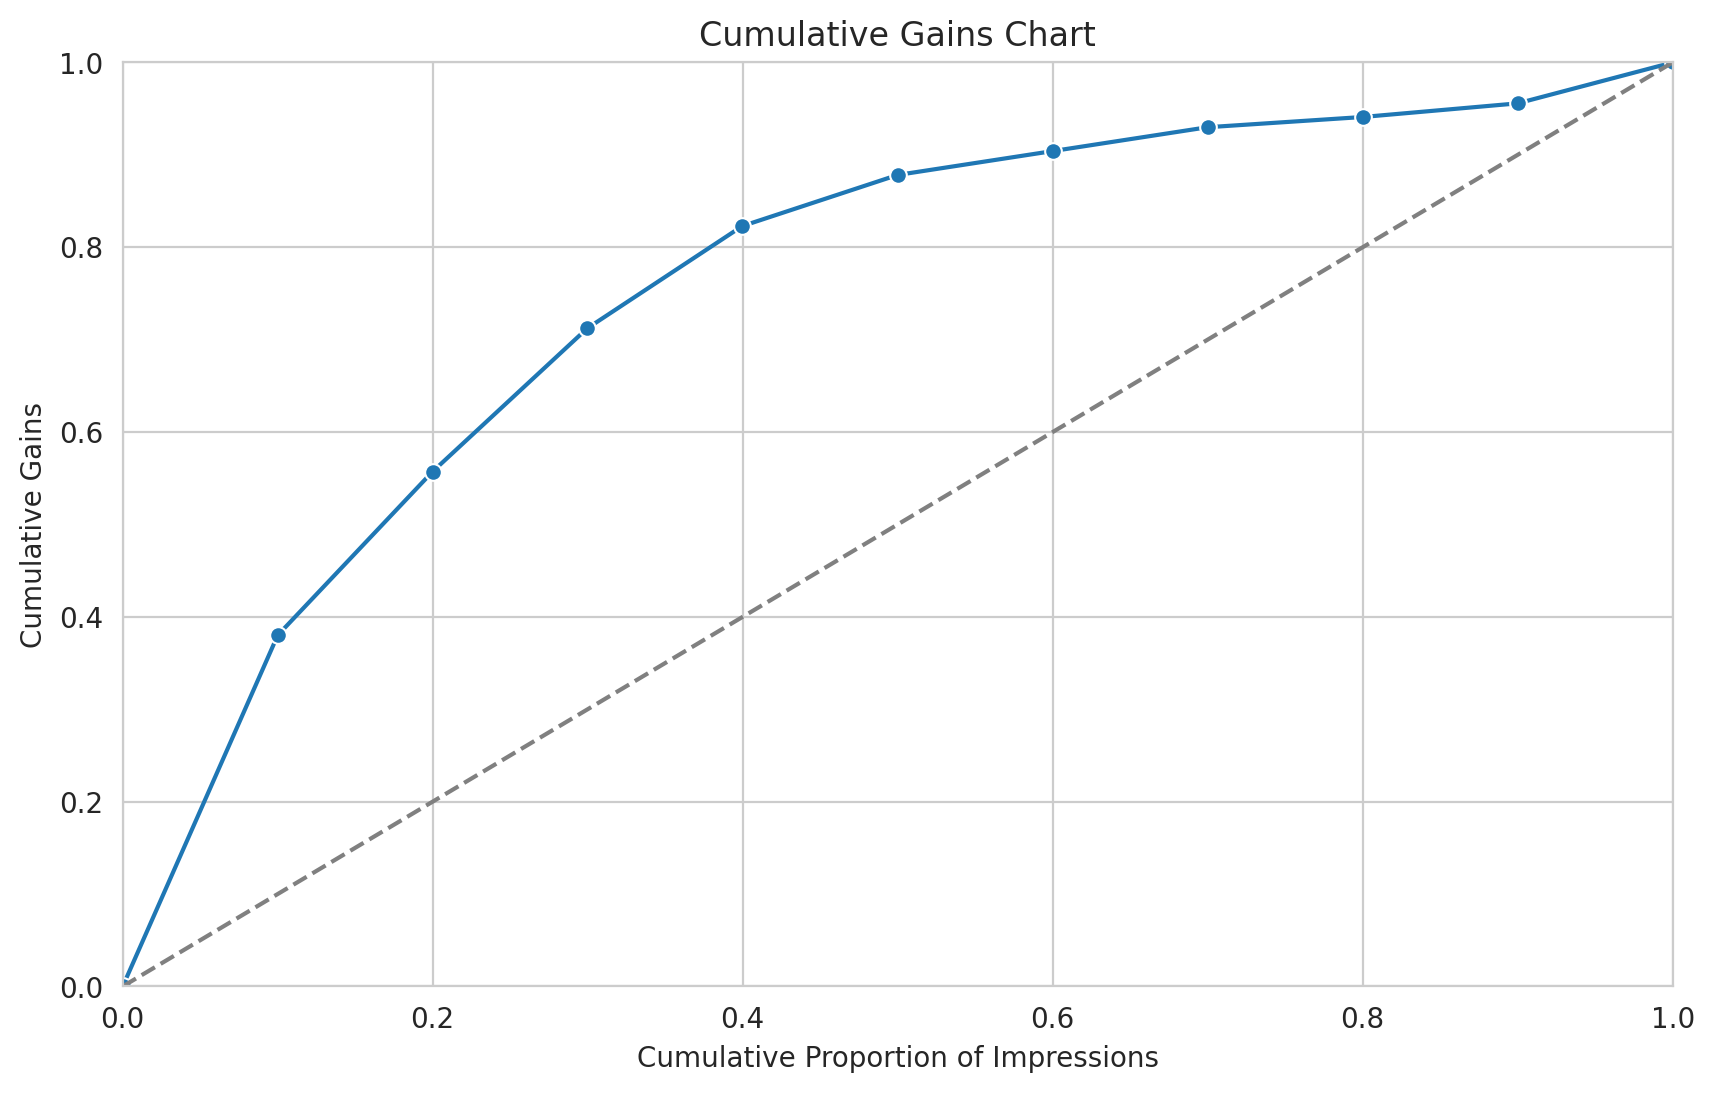

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the gains_table DataFrame includes a point at (0,0)
if gains_table['cumulative_proportion'].iloc[0] != 0:
    zero_point = pd.DataFrame({'pred_logit_dec': [gains_table['pred_logit_dec'].min() - 1], 'cumulative_proportion': [0], 'cumulative_gains': [0]})
    gains_table = pd.concat([zero_point, gains_table]).reset_index(drop=True)

# Set the style for the plot
sns.set_style("whitegrid")

# Create a line plot for cumulative gains
plt.figure(figsize=(10, 6))
sns.lineplot(data=gains_table, x='cumulative_proportion', y='cumulative_gains', marker='o')

# Add a diagonal line for the "no model" scenario
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Add titles and labels
plt.title('Cumulative Gains Chart')
plt.xlabel('Cumulative Proportion of Impressions')
plt.ylabel('Cumulative Gains')

# Ensure the plot starts from zero
plt.xlim(0, 1)
plt.ylim(0, 1)

# Show the plot
plt.show()


## Part V: Confusion matrix (10 points)

a. Create a "confusion matrix" based on the predictions from the logistic regression model you estimated in Part I.a (i.e., the model used to generate `pred_logit`). Again, use **only** data from the test set here (i.e., "training == 'test'"). Use the financial assumptions mentioned above, and repeated in section VI below, to determine an appropriate cut-off (i.e., breakeven). Calculate "accuracy" based on the confusion matrix you created (2 points)

> Note: Do NOT use any specialized packages to construct the confusion matrix. Code the matrix from scratch.  Feel free use ChatGPT or CoPilot, but make sure that it does not use any specialized packages to construct the gains table. Be prepared to discuss the code you submit for this question in class if called upon

In [29]:
cost = 10 / 1000
cost_per_click = cost / 0.05
clv = 25
break_even = cost_per_click / clv

cost, break_even

(0.01, 0.008)

In [30]:
test_data = tz_gaming.loc[tz_gaming['training'] == 'test'].copy()

In [31]:
test_data.loc[:, 'predicted'] = test_data['pred_logit'].apply(lambda x: 'yes' if x >= break_even else 'no')

TP = len(test_data[(test_data['click'] == 'yes') & (test_data['predicted'] == 'yes')])
FP = len(test_data[(test_data['click'] == 'no') & (test_data['predicted'] == 'yes')])
TN = len(test_data[(test_data['click'] == 'no') & (test_data['predicted'] == 'no')])
FN = len(test_data[(test_data['click'] == 'yes') & (test_data['predicted'] == 'no')])


> Note use the code format below to store the relevant values from your confusion matrix

In [32]:
cm_logit = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP, FP, TN, FN]
    }
)

cm_logit

,label,nr
0,TP,221
1,FP,10661
2,TN,17021
3,FN,50


In [33]:
accuracy_logit = (TP + TN) / (TP + FP + TN + FN)

accuracy_logit

0.6168210925482059

b. Calculate a DataFrame with elements from a confusion matrix based on `pred_rnd` created in Part I and calculate `accuracy` based on the confusion matrix you created (2 points)

In [34]:
# Apply the prediction logic based on pred_rnd
test_data.loc[:, 'predicted_rnd'] = test_data['pred_rnd'].apply(lambda x: 'yes' if x >= break_even else 'no')

# Calculate TP, FP, TN, FN for pred_rnd
TP_rnd = len(test_data[(test_data['click'] == 'yes') & (test_data['predicted_rnd'] == 'yes')])
FP_rnd = len(test_data[(test_data['click'] == 'no') & (test_data['predicted_rnd'] == 'yes')])
TN_rnd = len(test_data[(test_data['click'] == 'no') & (test_data['predicted_rnd'] == 'no')])
FN_rnd = len(test_data[(test_data['click'] == 'yes') & (test_data['predicted_rnd'] == 'no')])

> Note use the code format below to store the relevant values from your confusion matrix

In [35]:
# Create a DataFrame with the confusion matrix for pred_rnd
cm_rnd = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP_rnd, FP_rnd, TN_rnd, FN_rnd]
    }
)

cm_rnd

,label,nr
0,TP,271
1,FP,27606
2,TN,76
3,FN,0


In [36]:
accuracy_rnd = (TP_rnd + TN_rnd) / (TP_rnd + FP_rnd + TN_rnd + FN_rnd)

accuracy_rnd

0.012413694415626229

c. Discuss the similarities and differences between the two confusion matrices. Which prediction (model) is best, based on the confusion matrix? Provide support for your conclusions (3 points)

Similarities:

Both models are used to predict ad clicks ('yes' or 'no').

Each model generates four possible outcomes: True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN).

Differences:

Logit Model:
True Positives (TP): 221
False Positives (FP): 10,661
True Negatives (TN): 17,021
False Negatives (FN): 50
Accuracy: 61.68%

Rnd Model:
True Positives (TP): 271
False Positives (FP): 27,606
True Negatives (TN): 76
False Negatives (FN): 0
Accuracy: 1.24%

Analysis:

The Logit model significantly outperforms the Rnd model in terms of accuracy. This indicates that the Logit model is more accurate and reliable in predicting click behavior.
The Rnd model has a substantially higher number of False Positives (FP) compared to the Logit model, leading to a drastically lower accuracy. This might be due to the Rnd model being too lenient in determining the probability of clicks, resulting in many non-click events being incorrectly predicted as clicks.
The Logit model shows better performance in differentiating between click and non-click events, despite its relatively high number of False Positives (FP). However, compared to the Rnd model, it is more effective in identifying true click events (TP) and correctly excluding non-click events (TN).

Conclusion:

Based on the results of the confusion matrix, the Logit model is the better choice. Its higher accuracy demonstrates its effectiveness and reliability in predicting user click behavior. In contrast, the Rnd model performs poorly in identifying true click behavior, and its low accuracy could lead to inefficient and wasteful use of advertising resources. Therefore, I recommend using the Logit model for targeting in ad placements.

d. Recalculate the confusion matrices from V.a and V.b using 0.5 as the cutoff. Based on these new matrices, again discuss the similarities and differences. Which model is best based on these new confusion matrices? Provide support for your conclusions (3 points)

In [37]:
cut_off = 0.5

TP_logit = len(test_data[(test_data['click'] == 'yes') & (test_data['pred_logit'] >= cut_off)])
FP_logit = len(test_data[(test_data['click'] == 'no') & (test_data['pred_logit'] >= cut_off)])
TN_logit = len(test_data[(test_data['click'] == 'no') & (test_data['pred_logit'] < cut_off)])
FN_logit = len(test_data[(test_data['click'] == 'yes') & (test_data['pred_logit'] < cut_off)])

> Note use the code format below to store the relevant values from your confusion matrix

In [38]:
cm_logit_recalc = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP_logit, FP_logit, TN_logit, FN_logit]
    }
)

cm_logit_recalc

,label,nr
0,TP,0
1,FP,0
2,TN,27682
3,FN,271


In [39]:
accuracy_logit_recalc = (TP_logit + TN_logit) / (TP_logit + FP_logit + TN_logit + FN_logit)

accuracy_logit_recalc

0.9903051550817443

In [40]:
cut_off = 0.5

TP_rnd = len(test_data[(test_data['click'] == 'yes') & (test_data['pred_rnd'] >= cut_off)])
FP_rnd = len(test_data[(test_data['click'] == 'no') & (test_data['pred_rnd'] >= cut_off)])
TN_rnd = len(test_data[(test_data['click'] == 'no') & (test_data['pred_rnd'] < cut_off)])
FN_rnd = len(test_data[(test_data['click'] == 'yes') & (test_data['pred_rnd'] < cut_off)])

> Note use the code format below to store the relevant values from your confusion matrix

In [41]:
cm_rnd_recalc = pd.DataFrame(
    {
        "label": ["TP", "FP", "TN", "FN"],
        "nr": [TP_rnd, FP_rnd, TN_rnd, FN_rnd]
    }
)

cm_rnd_recalc

,label,nr
0,TP,0
1,FP,0
2,TN,27682
3,FN,271


In [42]:
accuracy_rnd_recalc = (TP_rnd + TN_rnd) / (TP_rnd + FP_rnd + TN_rnd + FN_rnd)

accuracy_rnd_recalc

0.9903051550817443

Recalculated Confusion Matrices:

Logit Model (Recalculated):

True Positives (TP): 0
False Positives (FP): 0
True Negatives (TN): 27,682
False Negatives (FN): 271
Recalculated Accuracy: 99.03%

Rnd Model (Recalculated):

True Positives (TP): 0
False Positives (FP): 0
True Negatives (TN): 27,682
False Negatives (FN): 271
Recalculated Accuracy: 99.03%

Analysis:

Similarities:

Both models, after recalibration with a 0.5 cutoff, yield identical confusion matrices. Neither model predicts any True Positives or False Positives, implying no instances were classified as clicks.
Both models achieve the same recalculated accuracy of 99.03%, which is significantly higher than their previous accuracies.

Differences:

The primary difference lies in the context of each model’s predictive capabilities. The Logit model's initial performance, before recalibration, was superior in terms of balancing the detection of True Positives with False Positives. This context is lost after recalibration with a 0.5 cutoff, as both models now equally avoid predicting any positive instances (clicks).

Conclusion:

Based on the recalculated confusion matrices, it appears that both models perform identically with the new cutoff, making it challenging to declare a definitive 'better' model based on these results alone. However, considering the context from the initial confusion matrices, where the Logit model demonstrated a more balanced approach in identifying True Positives while minimizing False Positives, the Logit model might still be considered superior in practical scenarios.

The shift in model performance due to the change in cutoff highlights the importance of choosing an appropriate threshold that balances sensitivity (True Positive Rate) and specificity (True Negative Rate). A cutoff of 0.5 in this case may be too conservative, leading to an underestimation of potential click events. This emphasizes the need for a nuanced approach in setting thresholds, considering both the models' statistical performance and the practical implications of their predictions.

## Part VI: Model comparison (12 points)


Use the following cost information to assess the profitability each of these models for targeting purposes during the upcoming advertising campaign where TZ will purchase 20-million impressions from Vneta:

* Cost per 1,000 video impressions (CPM) is $10
* Conversion to sign-up as a TZ game player after clicking on an ad is 5%
* The expected CLV of customers that sign-up with TZ after clicking on an ad is approximately $25
* The total cost of the data from Vneta is $50K
* The total cost charged for the data science consulting services by Vneta is $150K

Use `pred_logit`, `pred_rnd`, and the predictions from Vneta based on their proprietary model `pred_vneta` to compare model performance.

> Note: The currently available data (+ the `pred_vneta` prediction) are free as part of the partnership between Vneta and TZ-gaming

a. Create a new variable `target_logit` that is `True` if the predicted click-through (`pred_logit`) probability is greater than the break-even response rate and `FALSE` otherwise (1 point)

In [43]:
cost_per_1000_impressions = 10  # CPM $10
cost_per_click = cost_per_1000_impressions / (1000 * 0.05)  # Conversion rate is 5%
clv = 25  # Customer Lifetime Value
break_even_response_rate = cost_per_click / clv

break_even_response_rate

0.008

In [44]:
tz_gaming["target_logit"] = tz_gaming["pred_logit"] > break_even_response_rate

target_logit = tz_gaming["target_logit"]

b. Create a new variable `target_rnd` that is `True` if the predicted click-through (`pred_rnd`) probability is greater than the break-even response rate and `FALSE` otherwise (1 point)

In [45]:
tz_gaming["target_rnd"] = tz_gaming["pred_rnd"] > break_even_response_rate

target_rnd = tz_gaming["target_rnd"]

c. Create a new variable `target_vneta` that is `True` if the predicted click-through (`pred_vneta`) probability is greater than the break-even response rate and `False` otherwise (1 point)

In [46]:
# insert your answer here
tz_gaming["target_vneta"] = tz_gaming["pred_vneta"] > break_even_response_rate

target_vneta = tz_gaming["target_vneta"]

d. Based only on the test set (i.e, `training == "test"`), calculate the expected profit (in dollars) and the expected return on marketing expenditures (ROME) if TZ (1) `spams` everyone in the test set, (2) continues to target using their current approach (`pred_rnd`), (3) purchases the data from Vneta and uses the logistic regression from I (`pred_logit`) for targeting, or (4) used Vneta's data science consulting services (`pred_vneta`) (3 points)

> Note: For efficiency, you can adapt the `perf_calc_actual` function you created for the Tuango case to do the relevant performance calculations for the different models

In [47]:
tz_gaming["pred_spam"] = 1
tz_gaming["target_spam"] = True


tz_test = tz_gaming[tz_gaming['training'] == 'test']

n = len(tz_test) 
cost_per_1000_impressions = 10 
cost = n / 1000 * cost_per_1000_impressions

click_true = tz_test[tz_test['click'] == 'yes'].shape[0]
response_rate = click_true / n
responded = n * response_rate
registered = responded * 0.05
revenue = registered * 25

profit_spam = revenue - cost
ROME_spam = profit_spam / cost

print(f"Expected Profit: ${profit_spam:.2f}")
print(f"Return on Marketing Expenditure (ROME): {ROME_spam:.2%}")


Expected Profit: $59.22
Return on Marketing Expenditure (ROME): 21.19%


In [48]:
tz_logit_targeted = tz_test[tz_test["target_logit"]]

n_logit = len(tz_logit_targeted)
cost_logit = n_logit / 1000 * cost_per_1000_impressions

click_true_logit = tz_logit_targeted[tz_logit_targeted['click'] == 'yes'].shape[0]
response_rate_logit = click_true_logit / n_logit
responded_logit = n_logit * response_rate_logit
registered_logit = responded_logit * 0.05
revenue_logit = registered_logit * 25

profit_logit = revenue_logit - cost_logit
ROME_logit = profit_logit / cost_logit

print(f"Logit Expected Profit: ${profit_logit:.2f}")
print(f"Logit Return on Marketing Expenditure (ROME): {ROME_logit:.2%}")


Logit Expected Profit: $167.43
Logit Return on Marketing Expenditure (ROME): 153.86%


In [49]:
tz_rnd_targeted = tz_test[tz_test["target_rnd"]]

n_rnd = len(tz_rnd_targeted)
cost_rnd = n_rnd / 1000 * cost_per_1000_impressions

click_true_rnd = tz_rnd_targeted[tz_rnd_targeted['click'] == 'yes'].shape[0]
response_rate_rnd = click_true_rnd / n_rnd
responded_rnd = n_rnd * response_rate_rnd
registered_rnd = responded_rnd * 0.05
revenue_rnd = registered_rnd * 25

profit_rnd = revenue_rnd - cost_rnd
ROME_rnd = profit_rnd / cost_rnd

print(f"Rnd Expected Profit: ${profit_rnd:.2f}")
print(f"Rnd Return on Marketing Expenditure (ROME): {ROME_rnd:.2%}")


Rnd Expected Profit: $59.98
Rnd Return on Marketing Expenditure (ROME): 21.52%


In [50]:
tz_vneta_targeted = tz_test[tz_test["target_vneta"]]

n_vneta = len(tz_vneta_targeted)
cost_vneta = n_vneta / 1000 * cost_per_1000_impressions

click_true_vneta = tz_vneta_targeted[tz_vneta_targeted['click'] == 'yes'].shape[0]
response_rate_vneta = click_true_vneta / n_vneta
responded_vneta = n_vneta * response_rate_vneta
registered_vneta = responded_vneta * 0.05
revenue_vneta = registered_vneta * 25

profit_vneta = revenue_vneta - cost_vneta
ROME_vneta = profit_vneta / cost_vneta

print(f"Vneta Expected Profit: ${profit_vneta:.2f}")
print(f"Vneta Return on Marketing Expenditure (ROME): {ROME_vneta:.2%}")


Vneta Expected Profit: $151.29
Vneta Return on Marketing Expenditure (ROME): 310.59%


In [51]:
tz_gaming["pred_spam"] = 1
tz_gaming["target_spam"] = True

mod_perf = pd.DataFrame(
    {
        "model": [
            "logit",
            "rnd",
            "vneta",
            "spam",
        ],
        "profit": [profit_logit, profit_rnd, profit_vneta, profit_spam],
        "ROME": [ROME_logit, ROME_rnd, ROME_vneta, ROME_spam]
    }
)

mod_perf

,model,profit,ROME
0,logit,167.43,1.538596
1,rnd,59.98,0.215159
2,vneta,151.29,3.105933
3,spam,59.22,0.211856


e. Based on the results from VI.d discuss which of these 4 approaches you would recommend and why (2 points)

Spam (Targeting Everyone in the Test Set):

Profit: $59.22
ROME: 21.19%
Analysis: This approach, while straightforward to implement, exhibits relatively lower efficiency. Despite covering all users in the test set, the lack of precision in targeting results in a lower rate of return.
Rnd (Current Targeting Approach):

Profit: $59.98
ROME: 21.52%
Analysis: This method shows a slight improvement over spam, indicating some level of effectiveness in targeted advertising. However, the marginal increase in benefits suggests that there is room for improvement in the current targeting strategy.
Logit (Purchasing Vneta Data and Using Logistic Regression for Targeting):

Profit: $167.43
ROME: 153.86%
Analysis: This method significantly outperforms the others in terms of profit and return rate. It indicates that the logistic regression model is more effective in identifying potential clickers, thus enhancing the efficiency and effectiveness of ad targeting.
Vneta (Using Vneta's Data Science Consulting Services):

Profit: $151.29
ROME: 310.59%
Analysis: Although the Vneta model has a slightly lower profit than the Logit model, it achieves the highest ROME. This implies that, in terms of investment return ratio, the Vneta model is highly efficient.
Recommendation:

Based on these results, I would recommend either the Logit model or the Vneta's data science consulting services. The Logit model performs best in terms of profit, making it the ideal choice if the goal is to maximize revenue. The Vneta model, while slightly lower in profit, demonstrates the highest efficiency in investment return, making it a better choice if cost-effectiveness is a priority.

In making the final decision, TZ Gaming should consider factors such as their advertising budget, revenue goals, and cost control needs. If the budget is ample and maximizing revenue is a priority, the Logit model would be the preferred choice; if the budget is more constrained and cost-effectiveness is valued, the Vneta model might be more suitable.

f. Calculate the profit and ROME implications for each of the 4 options mentioned in VI.d if TZ purchases 20-million impression for the upcoming ad campaign (2 points)

> Note: Calculate total profits under the assumption that options (3) and (4) are free of charge. Then compare the profit numbers to determine if these options would be worth the expense going forward.

> Note: For efficiency, you can adapt the `perf_calc` function you created for the Tuango case to do the relevant performance calculations for the different models.

In [52]:
Impression_20M = 20000000
Total_cost = Impression_20M * cost_per_1000_impressions
Total_cost

200000000

In [53]:
total_logit = Impression_20M * (tz_test["target_logit"].sum() / len(tz_test))
cost_logit_20M = total_logit * (cost_per_1000_impressions / 1000)
click_true_logit_20M = tz_test[(tz_test["click"] == "yes") & (tz_test["target_logit"] == True)]
response_rate_logit_20M = click_true_logit_20M["click"].count() / tz_test["target_logit"].sum()
responded_logit_20M = total_logit * response_rate_logit_20M
registered_logit_20M = responded_logit_20M * 0.05
revenue_logit_20M = registered_logit_20M * 25
profit_logit_20M = revenue_logit_20M - cost_logit_20M
ROME_logit_20M = profit_logit_20M / cost_logit_20M

profit_logit_20M, ROME_logit_20M

(119793.93982756774, 1.5385958463517742)

In [54]:
# Total number of targeted impressions for the rnd model
total_rnd = Impression_20M * (tz_test["target_rnd"].sum() / len(tz_test))

# Total cost for the rnd model
cost_rnd_20M = total_rnd * (cost_per_1000_impressions / 1000)

# Number of true clicks for the rnd model
click_true_rnd_20M = tz_test[(tz_test["click"] == "yes") & (tz_test["target_rnd"] == True)]

# Response rate for the rnd model
response_rate_rnd_20M = click_true_rnd_20M["click"].count() / tz_test["target_rnd"].sum()

# Number of users who responded for the rnd model
responded_rnd_20M = total_rnd * response_rate_rnd_20M

# Number of registered users for the rnd model
registered_rnd_20M = responded_rnd_20M * 0.05

# Total revenue for the rnd model
revenue_rnd_20M = registered_rnd_20M * 25

# Total profit for the rnd model
profit_rnd_20M = revenue_rnd_20M - cost_rnd_20M

# ROME for the rnd model
ROME_rnd_20M = profit_rnd_20M / cost_rnd_20M


profit_rnd_20M, ROME_rnd_20M

(42914.89285586518, 0.21515945044301743)

In [55]:
# Total number of targeted impressions for the vneta model
total_vneta = Impression_20M * (tz_test["target_vneta"].sum() / len(tz_test))

# Total cost for the vneta model
cost_vneta_20M = total_vneta * (cost_per_1000_impressions / 1000)

# Number of true clicks for the vneta model
click_true_vneta_20M = tz_test[(tz_test["click"] == "yes") & (tz_test["target_vneta"] == True)]

# Response rate for the vneta model
response_rate_vneta_20M = click_true_vneta_20M["click"].count() / tz_test["target_vneta"].sum()

# Number of users who responded for the vneta model
responded_vneta_20M = total_vneta * response_rate_vneta_20M

# Number of registered users for the vneta model
registered_vneta_20M = responded_vneta_20M * 0.05

# Total revenue for the vneta model
revenue_vneta_20M = registered_vneta_20M * 25

# Total profit for the vneta model
profit_vneta_20M = revenue_vneta_20M - cost_vneta_20M

# ROME for the vneta model
ROME_vneta_20M = profit_vneta_20M / cost_vneta_20M

profit_vneta_20M, ROME_vneta_20M


(108245.98433084103, 3.1059330732909047)

In [56]:
# For the spam model, every impression is targeted
total_spam = Impression_20M 

# Total cost for the spam model
cost_spam_20M = total_spam * (cost_per_1000_impressions / 1000)

# Number of true clicks for the spam model
click_true_spam_20M = tz_test[tz_test["click"] == "yes"]

# Response rate for the spam model
response_rate_spam_20M = click_true_spam_20M["click"].count() / len(tz_test)

# Number of users who responded for the spam model
responded_spam_20M = total_spam * response_rate_spam_20M

# Number of registered users for the spam model
registered_spam_20M = responded_spam_20M * 0.05

# Total revenue for the spam model
revenue_spam_20M = registered_spam_20M * 25

# Total profit for the spam model
profit_spam_20M = revenue_spam_20M - cost_spam_20M

# ROME for the spam model
ROME_spam_20M = profit_spam_20M / cost_spam_20M

profit_spam_20M, ROME_spam_20M

(42371.122956391075, 0.2118556147819554)

In [57]:
mod_perf_20M = pd.DataFrame(
    {
        "model": [
            "logit",
            "rnd",
            "vneta",
            "spam",
        ],
        "profit": [profit_logit_20M, profit_rnd_20M, profit_vneta_20M, profit_spam_20M],
        "ROME": [ROME_logit, ROME_rnd, ROME_vneta, ROME_spam]
    }
)

mod_perf_20M

,model,profit,ROME
0,logit,119793.939828,1.538596
1,rnd,42914.892856,0.215159
2,vneta,108245.984331,3.105933
3,spam,42371.122956,0.211856


g. Based on the results from VI.f, discuss which of the 4 approaches you would recommend to put into production and why. Is your recommendation different from VI.e? Why (not) (2 points)

> Note: Calculate total profits under the assumption that options (3) and (4) are free of charge. Then compare the profit numbers to determine if these options would be worth the expense going forward.

> Note: For efficiency, consider adapting the `perf_calc` function you created for the Tuango case to do the relevant performance calculations for the different models.

Based on the results from VI.f, let's analyze the four approaches for a 20-million impression ad campaign and determine which would be the most beneficial to put into production:

Logit Model:

Profit: $119,793.94
ROME: 153.86%
Analysis: The Logit model shows the highest profit among all models, coupled with a robust ROME. This indicates a significant return on investment, making it an efficient and profitable choice.
Rnd Model:

Profit: $42,914.89
ROME: 21.52%
Analysis: While better than the spam model, the Rnd model falls significantly short in comparison to the Logit and Vneta models in both profit and ROME.
Vneta Model:

Profit: $108,245.98
ROME: 310.59%
Analysis: The Vneta model demonstrates an impressive ROME, indicating exceptional efficiency. Its profit is slightly lower than the Logit model, but the return relative to investment is remarkable.
Spam Model:

Profit: $42,371.12
ROME: 21.19%
Analysis: The spam approach yields the lowest profit and ROME, showing its lack of efficiency in utilizing the ad impressions.
Recommendation:

The recommendation would be to adopt the Logit model for the upcoming ad campaign, primarily due to its highest profit margin, which is crucial for maximizing revenue. However, if TZ Gaming prioritizes efficiency and return on investment, the Vneta model would be an excellent choice, given its highest ROME.

Comparison with VI.e:

This recommendation aligns with the conclusion in VI.e, where the Logit and Vneta models were also suggested. The results from the 20-million impression scenario reinforce the earlier recommendation, emphasizing the financial viability and efficiency of these two models. The choice between Logit and Vneta should be based on TZ Gaming's specific goals: whether they aim for the highest profit (Logit) or the most efficient use of their advertising budget (Vneta).
